To prove pruning worked.
Amount of columns in csv data: 12
Amount of columns in pruned data: 6
   experience_level_EN  experience_level_EX  experience_level_MI  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    1   
4                    0                    0                    0   

   experience_level_SE  
0                    0  
1                    1  
2                    1  
3                    0  
4                    1  
     company_location
0                  12
1                  29
2                  18
3                  20
4                  48
..                ...
602                48
603                48
604                48
605                48
606                48

[607 rows x 1 columns]
     company_location
0            0.244898
1            0

/var/folders/8g/5mz1hznx4c713h92c_kwq2yh0000gn/T/ipykernel_96879/3924128544.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_data['cut'] = pd.cut(pruned_data['salary_in_usd'], bins=5)
/var/folders/8g/5mz1hznx4c713h92c_kwq2yh0000gn/T/ipykernel_96879/3924128544.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data['cut'] = pd.cut(_data['salary_in_usd'], bins=5)
/var/folders/8g/5mz1hznx4c713h92c_kwq2yh0000gn/T/ipykernel_96879/3924128544.py:54: SettingWithCopyWarning: 
A value is trying to be se

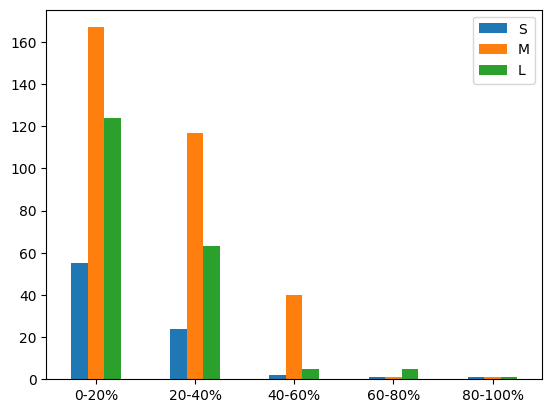

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing



# TODO: 1) Feature space from csv file. Read data/ds_salaries.csv into a pandas dataframe
data = pd.read_csv('../../data/ds_salaries.csv')

# TODO: 2) Prune the dataset to only have columns:
#  "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
pruned_data = data[['work_year', 'experience_level', 'salary_in_usd', 'job_title', 'company_location', 'company_size']]
print("To prove pruning worked.")
print(f"Amount of columns in csv data: {len(data.columns)}")
print(f"Amount of columns in pruned data: {len(pruned_data.columns)}")

# TODO: 3) Onehot Encode "experience_level".
#  Hint: look up pandas: get_dummies() method.
one_hotted_pd = pd.get_dummies(pruned_data['experience_level'], prefix='experience_level')
print(one_hotted_pd.head())

# TODO: 4) Label Encode "company_location"
label_pd = pruned_data[['company_location']].apply(LabelEncoder().fit_transform)
print(label_pd)

# TODO: 5) Normalize the company_location number (relative value between 0-1)
#  X_norm = (x - x_Min) / (x_Max - x_Min) // Or just use preprocessing.MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
names = label_pd.columns
d = scaler.fit_transform(label_pd)
scaled_df = pd.DataFrame(d, columns=names)
print(scaled_df)

# TODO: 6) Make binning of the salary column (both cut and qcut methods).
# cut()
pruned_data['cut'] = pd.cut(pruned_data['salary_in_usd'], bins=5)
print(pruned_data['cut'].value_counts())
# qcut()
bin_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

results, bin_edges = pd.qcut(pruned_data['salary_in_usd'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels),
                            columns=['Salary', 'Bins'])
print(results_table)

# TODO: 7) Make a barplot with binned salaries to show the company size count for each of the bins.
# Made method because: I needed to know how many times an employee hit the specified bin in each company_size.
def binned_salary_in_company_size(size):
    _data = pruned_data.loc[pruned_data['company_size'] == size]
    _data['cut'] = pd.cut(_data['salary_in_usd'], bins=5)

    return _data['cut'].value_counts().tolist()


small_company_bin_salary = binned_salary_in_company_size('S')
medium_company_bin_salary = binned_salary_in_company_size('M')
large_company_bin_salary = binned_salary_in_company_size('L')
index = bin_labels

plot_df = pd.DataFrame({'S': small_company_bin_salary,
                        'M': medium_company_bin_salary,
                        'L': large_company_bin_salary}, index=index)

ax = plot_df.plot.bar(rot=0)
